# Klein Model and Einstein Midpoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1-D Hyperboloid

In [2]:
alpha = np.linspace(-0.323*np.pi, 0.323*np.pi, 1000)
x0 = np.sinh(alpha)
x1 = np.cosh(alpha)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)

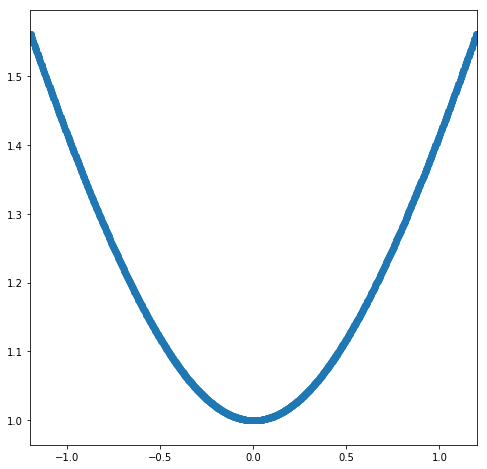

In [3]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2])
plt.scatter(x0, x1)

## Klein Model
$$K = \{(x_1,...,x_n, 1):x_1^2+...+x_n^2 < 1\}$$
Project from hyperboloid to Klein model: $$ \pi_{\mathbb{H}\to\mathbb{K}}(x)_i = \frac{x_i}{x_{n+1}}$$

In [4]:
def project_to_klein(v):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            v, a vector in ambient space coordinates, with nth dimension 'time-like'
        Output:
            a vector in Beltrami-Klein coordinates
    '''
    return v/v[:,-1].reshape([-1,1])

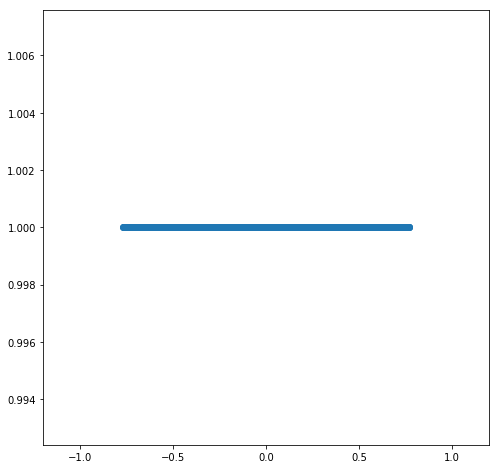

In [5]:
klein_pts = project_to_klein(x)
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2])
plt.scatter(klein_pts[:,0], klein_pts[:,1])

## 2-D Hyperboloid

In [6]:
alpha = np.linspace(-1., 1., 100)
theta = np.linspace(-np.pi, np.pi, 100)

alpha_mesh, theta_mesh = np.meshgrid(alpha, theta)

x0 = np.sinh(alpha_mesh)*np.cos(theta_mesh)
x1 = np.sinh(alpha_mesh)*np.sin(theta_mesh)
x2 = np.cosh(alpha_mesh)
print("Ranges: {:.3g} < x0 < {:.3g}, {:.3g} < x1 < {:.3g}, {:.3g} < x2 < {:.3g}".format(
            np.min(x0), np.max(x0),np.min(x1), np.max(x1),np.min(x2), np.max(x2),
        )
     )

Ranges: -1.18 < x0 < 1.18, -1.18 < x1 < 1.18, 1 < x2 < 1.54


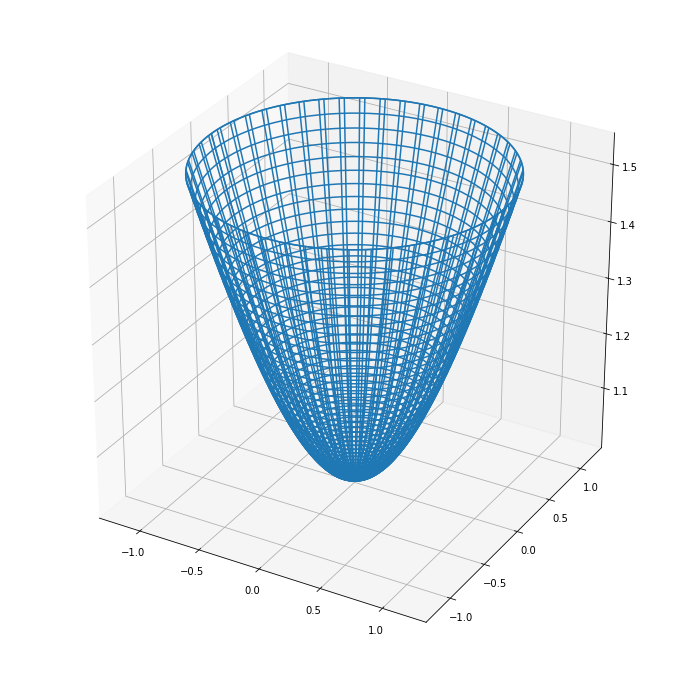

In [7]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x0, x1, x2)

In [8]:
def project_mesh_to_klein(mesh_list):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            mesh_list: list of meshes. Assumed last mesh is 'time-like' component
        Output:
            list of meshes in Beltrami-Klein coordinates
    '''
    t = mesh_list[-1]
    new_meshes = []
    for mesh in mesh_list:
        mesh = mesh/t
        new_meshes.append(mesh)
    
    return new_meshes

In [9]:
alpha = np.linspace(-1., 1., 100)
theta = np.linspace(-np.pi, np.pi, 100)
alpha_mesh, theta_mesh = np.meshgrid(alpha, theta)
x0 = np.sinh(alpha_mesh)*np.cos(theta_mesh)
x1 = np.sinh(alpha_mesh)*np.sin(theta_mesh)
x2 = np.cosh(alpha_mesh)
klein_pts = project_mesh_to_klein([x0, x1, x2])

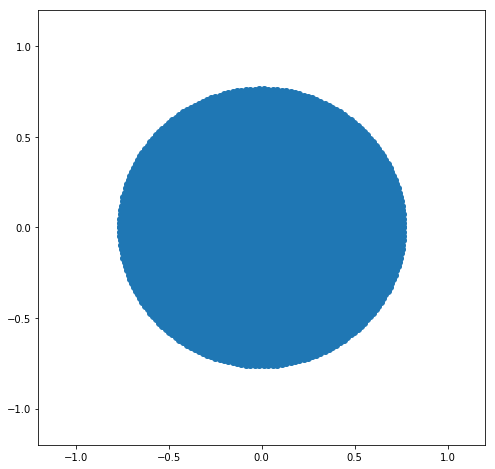

In [10]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2, 1.2])
plt.scatter(klein_pts[0], klein_pts[1])

### Projection from Klein model to Hyperboloid
$$\pi_{\mathbb{K}\to\mathbb{H}}(x)=\frac{1}{\sqrt{1-\|x\|^2}}(x, 1)$$

In [11]:
def project_mesh_from_klein(mesh_list):
    '''
        Project Beltrami-Klein ball points to hyperboloid
        Input:
            mesh_list: list of meshes. 
        Output:
            list of meshes in hyperboloid coordinates
    '''
    print("meshes =", mesh_list)
    new_meshes = []
    squares = np.zeros(mesh_list[0].shape)
    for mesh in mesh_list[:-1]:
        squares += mesh**2
    print("squares =", squares)
    coeff = 1./np.sqrt(1.-squares)
    
    for mesh in mesh_list:
        mesh = coeff*mesh
        new_meshes.append(mesh)
    
    #new_meshes.append(coeff)
    
    return new_meshes

In [12]:
hype_pts = project_mesh_from_klein(klein_pts)

meshes = [array([[ 0.76159416,  0.75297844,  0.74409659, ..., -0.74409659,
        -0.75297844, -0.76159416],
       [ 0.76006082,  0.75146245,  0.74259848, ..., -0.74259848,
        -0.75146245, -0.76006082],
       [ 0.75546699,  0.74692059,  0.73811019, ..., -0.73811019,
        -0.74692059, -0.75546699],
       ...,
       [ 0.75546699,  0.74692059,  0.73811019, ..., -0.73811019,
        -0.74692059, -0.75546699],
       [ 0.76006082,  0.75146245,  0.74259848, ..., -0.74259848,
        -0.75146245, -0.76006082],
       [ 0.76159416,  0.75297844,  0.74409659, ..., -0.74409659,
        -0.75297844, -0.76159416]]), array([[ 9.32683845e-17,  9.22132635e-17,  9.11255507e-17, ...,
        -9.11255507e-17, -9.22132635e-17, -9.32683845e-17],
       [ 4.83032866e-02,  4.77568440e-02,  4.71935224e-02, ...,
        -4.71935224e-02, -4.77568440e-02, -4.83032866e-02],
       [ 9.64120728e-02,  9.53213880e-02,  9.41970130e-02, ...,
        -9.41970130e-02, -9.53213880e-02, -9.64120728e-02],
    

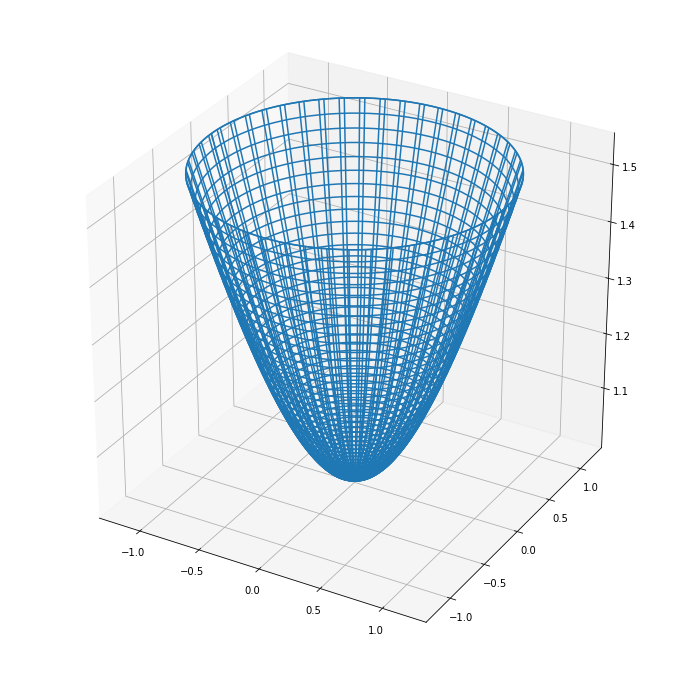

In [13]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(hype_pts[0], hype_pts[1], hype_pts[2])

## Frechet mean

In [14]:
from optimiser import frechet_diff, gradient_descent

In [15]:
alpha = 0.1
beta = 1.1
a = np.array([np.sinh(alpha), np.cosh(alpha)])
b = np.array([np.sinh(beta), np.cosh(beta)])
p_initial = np.array([np.sinh(2.5), np.cosh(2.5)])
points = [a,b]
frechet_diff(p_initial, points, geometry="hyperbolic")

array([-2.0518348 , -3.33582857])

In [16]:
updated_pts = [p_initial]
steps = []
projections = []
#learning_rates = np.arange(1., )
for i in range(1,10):
    updated_pt, step, projection = gradient_descent(
                             updated_pts[i-1], 
                             points, 
                             frechet_diff, 
                             geometry="hyperbolic", 
                             learning_rate=0.32,
                             return_vectors=True,
                        )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
print("updated_pts = ", updated_pts)
print("steps = ", steps)
print("projections = ", projections)

updated_pts =  [array([6.05020448, 6.13228948]), array([0.06805242, 1.00231289]), array([0.82097071, 1.29382878]), array([0.58774876, 1.15993474]), array([0.65054173, 1.19298136]), array([0.63278054, 1.18338971]), array([0.63773925, 1.18604863]), array([0.63634969, 1.18530204]), array([0.63673868, 1.18551092]), array([0.63662976, 1.18545242])]
steps =  [array([-2.0518348 , -3.33582857]), array([-2.4503801 , -4.82051297]), array([-2.80414333, -5.14503294]), array([-2.73847442, -5.12058318]), array([-2.75986236, -5.13291936]), array([-2.754102 , -5.1298924]), array([-2.75573296, -5.13077353]), array([-2.7552777 , -5.13052944]), array([-2.75540529, -5.13059799])]
projections =  [array([46.60540005, 45.98155406]), array([-2.13292183, -0.14481554]), array([0.77091494, 0.48916719]), array([-0.19351794, -0.09805718]), array([0.05572876, 0.03038931]), array([-0.0154786 , -0.00827669]), array([0.00434374, 0.00233563]), array([-0.00121548, -0.00065255]), array([0.0003404 , 0.00018283])]


In [17]:
alpha = np.linspace(-np.pi, np.pi, 1000)
x0 = np.sinh(alpha)
x1 = np.cosh(alpha)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)

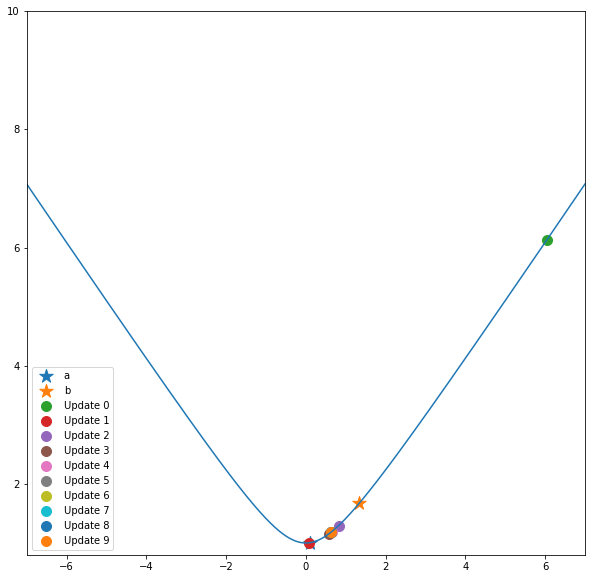

In [18]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca(xlim=[-7, 7], ylim=[0.8,10.])
plt.plot(x0, x1)
ax.scatter(points[0][0], points[0][1], marker='*',s=200,label = "a")
ax.scatter(points[1][0], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )

ax.legend()

## Einstein midpoint
$$ m_{uv} = \frac{\gamma_uu+\gamma_vv}{\gamma_u+\gamma_u} $$ where $\gamma_v = \frac{1}{\sqrt{1-\|v\|^2}}$

In [19]:
print("hyperboloid pts =", a, b)
print(a.shape, a.reshape([1, -1]).shape)
k_a = project_to_klein(a.reshape([1,-1]))
k_b = project_to_klein(b.reshape([1,-1]))
print("Beltrami-Klein pts = ", k_a, k_b)
gamma_a = 1./np.sqrt(1-np.linalg.norm(k_a[:-1])**2)
gamma_b = 1./np.sqrt(1-np.linalg.norm(k_b[:-1])**2)
print("gammas =", gamma_a, gamma_b)
midpoint = (gamma_a*k_a+gamma_b*k_b)/(gamma_a+gamma_b)
print(midpoint)

hyperboloid pts = [0.10016675 1.00500417] [1.33564747 1.66851855]
(2,) (1, 2)
Beltrami-Klein pts =  [[0.09966799 1.        ]] [[0.80049902 1.        ]]
gammas = 1.0 1.0
[[0.45008351 1.        ]]


In [20]:
k_frech = project_to_klein(np.array(updated_pts))

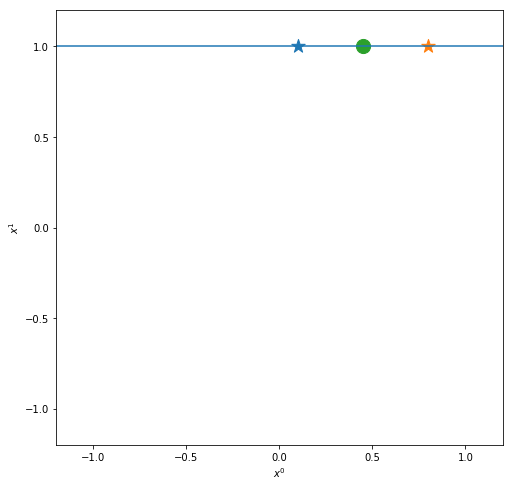

In [21]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
#circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_artist(circle)
ax.axhline(1., -1., 1.)
ax.scatter(k_a[0, 0], k_a[0, 1], marker='*',s=200,label = "a")
ax.scatter(k_b[0, 0], k_b[0, 1], marker='*',s=200,label = "b")

ax.scatter(midpoint[0, 0], midpoint[0, 1], marker='o',s=200,
           label = "Einstein midpoint")

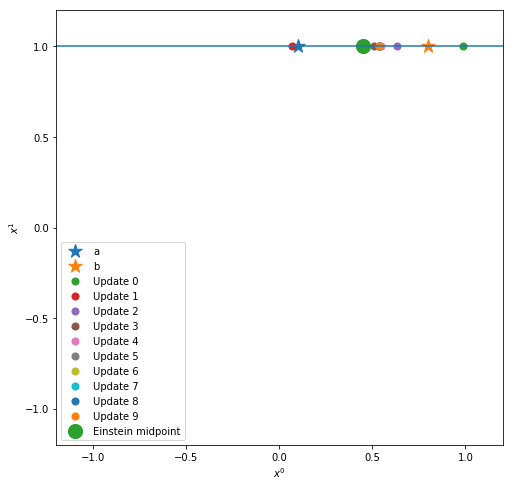

In [22]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
#circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_artist(circle)
ax.axhline(1., -1., 1.)
ax.scatter(k_a[0, 0], k_a[0, 1], marker='*',s=200,label = "a")
ax.scatter(k_b[0, 0], k_b[0, 1], marker='*',s=200,label = "b")
for i, pt in enumerate(k_frech):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=50, label="Update {}".format(i)
              )
ax.scatter(midpoint[0, 0], midpoint[0, 1], marker='o',s=200,
           label = "Einstein midpoint")
ax.legend()

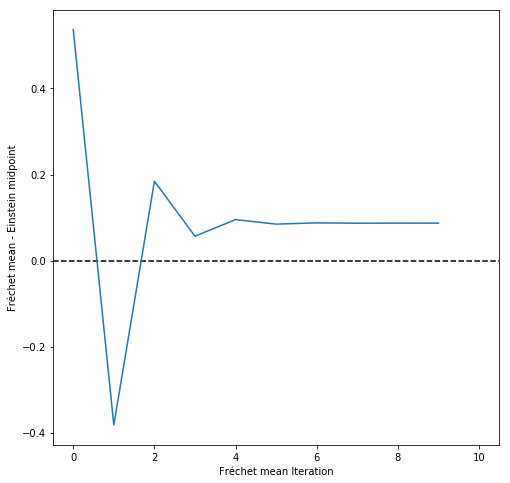

In [23]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-0.5, len(k_frech)+0.5], 
             xlabel="Fréchet mean Iteration",
             ylabel="Fréchet mean - Einstein midpoint", 
            )
ax.axhline(0., linestyle="--", color='k')

#k_frech[:,0] - midpoint[0,0]
ax.plot(range(len(k_frech)), k_frech[:,0] - midpoint[0,0])

Compare multiple points: is the Einstein midpoint always smaller than the Frechet mean?

In [54]:
def frechet_mean(points):
    updated_pt = np.array([0., 1.]).reshape(-1, 1)
    for i in range(1,6):
        updated_pt = gradient_descent(
                             updated_pt, 
                             points, 
                             frechet_diff, 
                             geometry="hyperbolic", 
                             learning_rate=0.32,
                             return_vectors=False,
                        )
    return updated_pt

In [55]:
def project_to_klein2(v):
    '''
        Project hyperboloid points to Beltrami-Klein ball
        Input:
            v, a vector in ambient space coordinates, with nth dimension 'time-like'
        Output:
            a vector in Beltrami-Klein coordinates
    '''
    return v/v[:,-1].reshape([-1,1])

In [56]:
def einstein_midpoint(points):
    print("points = ")
    print(points)
    print(points.shape)
    klein_pts = project_to_klein2(points)
    print("Klein points = ")
    print(klein_pts)
    gammas = 1./np.sqrt(1-np.linalg.norm(klein_pts[:-1])**2)
    print("gammas = ")
    print(gammas)
#    gamma_a = 1./np.sqrt(1-np.linalg.norm(k_a[:-1])**2)
#    gamma_b = 1./np.sqrt(1-np.linalg.norm(k_b[:-1])**2)
    return np.sum(gammas*klein_pts)/np.sum(gammas)

In [57]:
a = np.array([np.sinh(angle), np.cosh(angle)]).reshape(-1, 1)
print("a =", a)
b = np.array([np.sinh(angle2), np.cosh(angle2)]).reshape(-1, 1)
print("a.shape = {}, b.shape = {}".format(a.shape, b.shape))
print("np.array([a, b]).shape =", np.array([a, b]).shape)
print("np.hstack([a, b]).shape =", np.hstack([a, b]).shape)
print(np.hstack([a, b]))

a = [[-3.62686041]
 [ 3.76219569]]
a.shape = (2, 1), b.shape = (2, 1)
np.array([a, b]).shape = (2, 2, 1)
np.hstack([a, b]).shape = (2, 2)
[[-3.62686041 -2.37556795]
 [ 3.76219569  2.57746447]]


In [58]:
angles = np.linspace(-2, 2, 11)
print(angles)
einstein_midpts = []
frechet_means = []
for i, angle in enumerate(angles):
    print(i)
    a = np.array([np.sinh(angle), np.cosh(angle)]).reshape(-1, 1)
    print(a.shape)
    for angle2 in angles[i+1:]:
        b = np.array([np.sinh(angle2), np.cosh(angle2)]).reshape(-1, 1)
        print("{}, {}".format(a, b))
        frechet_means.append(frechet_mean([a, b]))
        print("Frechet mean = {}".format(frechet_means[-1]))
        einstein_midpts.append(einstein_midpoint(np.hstack([a, b])))
        print("Einstein midpoint = {}".format(einstein_midpts[-1]))
        print("-"*80)
    print("="*80)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
0
(2, 1)
[[-3.62686041]
 [ 3.76219569]], [[-2.37556795]
 [ 2.57746447]]


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

### Multiple dimensions comparison

Compare Fréchet mean to Einstein midpoint.
